<a href="https://colab.research.google.com/github/vishnupm-22/SMS_or_Email_Spam_Classifier/blob/main/SMS_email__Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:

data = pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')

In [ ]:
data.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5487,spam,2p per min to call Germany 08448350055 from yo...,NaN,NaN,NaN
2659,ham,Ok...,NaN,NaN,NaN
686,ham,Every King Was Once A Crying Baby And Every Gr...,NaN,NaN,NaN
886,ham,I like to talk pa but am not able to. I dont k...,NaN,NaN,NaN
2151,ham,I surely dont forgot to come:)i will always be...,NaN,NaN,NaN


In [ ]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data.shape

(5572, 5)

**DATA** **CLEANING**


In [ ]:
data.info()    # last 3 columns have very less null values # so we can drop 3 colms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
data.sample(5)

,v1,v2
4929,spam,"Hi, the SEXYCHAT girls are waiting for you to ..."
919,ham,Dont talk to him ever ok its my word.
528,spam,You will recieve your tone within the next 24h...
810,ham,S:)s.nervous &lt;#&gt; :)
4916,spam,This is the 2nd time we have tried 2 contact u...


In [ ]:
# Renaming the colms

In [ ]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
data.sample(5)

,target,text
2458,ham,"Cool, I'll text you when I'm on the way"
5107,ham,I REALLY NEED 2 KISS U I MISS U MY BABY FROM U...
1141,spam,I don't know u and u don't know me. Send CHAT ...
1399,ham,You have registered Sinco as Payee. Log in at ...
5485,ham,Also fuck you and your family for going to rho...


In [ ]:
# Normalizing the target between 0 and 1 using label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
l = LabelEncoder()

In [ ]:
# Fit_transform : Fit label encoder and return encoded labels

In [ ]:
data['target']=l.fit_transform(data['target'])

In [ ]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# check for duplicate values

In [ ]:
data.duplicated().sum()

403

In [ ]:
# Removing duplicates

In [ ]:
data=data.drop_duplicates(subset = ['target','text'],keep='first')  # keeps the last occurence

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int64

**EDA**

In [ ]:
# % of ham and spam in data

In [ ]:
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [ ]:
import matplotlib.pyplot as plt


<Axes: ylabel='target'>

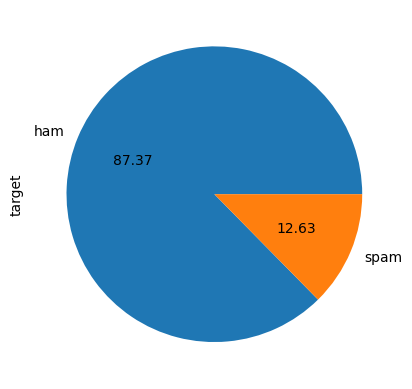

In [ ]:
data['target'].value_counts().plot(kind='pie',labels=['ham','spam'],autopct="%0.2f")  # autopct is for percentage 0.2 decimal

In [ ]:
# Data is imbalanced

In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data['num_chars']=data['text'].apply(len)

In [ ]:
data.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
data.shape

(5169, 3)

In [ ]:
# Num of words
 # apply is used for rows # creates list of words for each row

In [ ]:
data['num_words']= data['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [ ]:
data.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# num of sentences

In [ ]:
data['num_sentences']= data['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [ ]:
data.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
data[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
mask1 = data['target'] ==0
data_ham= data[mask1]

In [ ]:
data_ham[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
mask2 = data['target'] ==1
data_spam= data[mask2]

In [ ]:
data_spam[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
# clearly see the diff bet spam and ham

In [ ]:
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

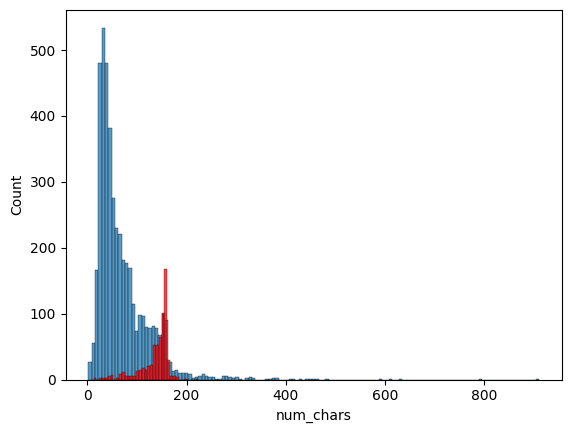

In [ ]:
sns.histplot(data_ham['num_chars'])
sns.histplot(data_spam['num_chars'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

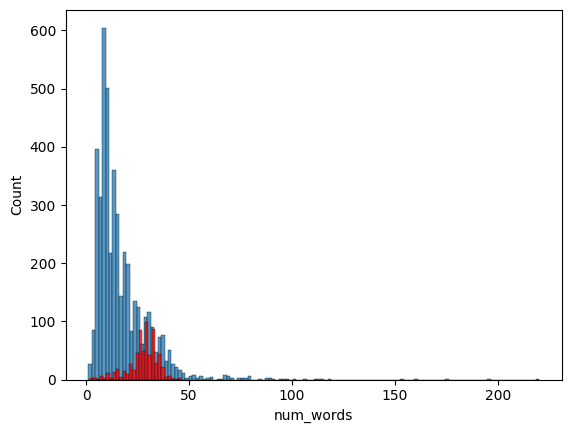

In [ ]:
sns.histplot(data_ham['num_words'])
sns.histplot(data_spam['num_words'],color='red')

In [ ]:
# showing correlation between the colms

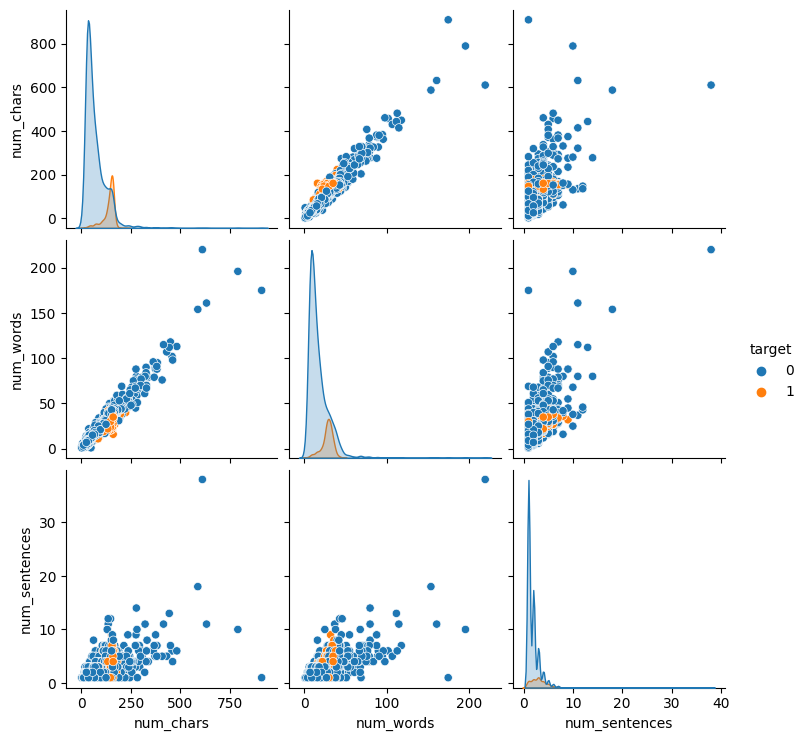

In [ ]:
sns.pairplot(data,hue='target')

In [ ]:
# there are some outliers in data

In [ ]:
data.corr()

<ipython-input-54-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,target,num_chars,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_chars,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<ipython-input-55-ec070f163d71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)  # annotation displays the values


<Axes: >

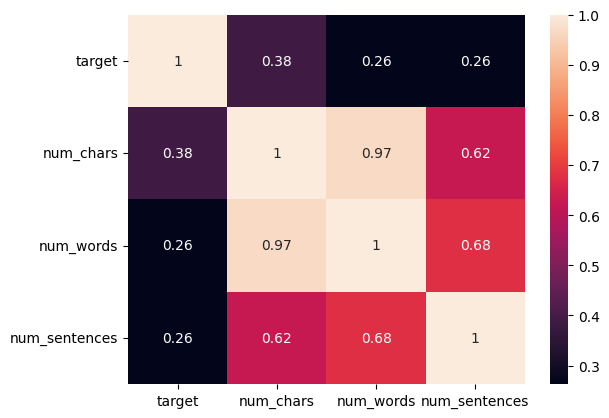

In [ ]:
sns.heatmap(data.corr(),annot=True)  # annotation displays the values

In [ ]:
# high correlation between the target and num_char

# **DATA PREPROCESSING**


*   lower case
*   tokenization


*   removing special characters
*   removing stop words and punctuation

*   stemming








In [ ]:
# lower case # tokenization # removing punctuation

In [ ]:

def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    y.append(s.stem(i))

  return " ".join(y)

In [ ]:
data['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from nltk.stem.porter import PorterStemmer
s = PorterStemmer()
s.stem('playing')

'play'

In [ ]:
data['transformed_text'] = data['text'].apply(lambda x : transform_text(x))

In [ ]:
data['transformed_text'].apply(lambda x : len(transform_text(x)))

0        76
1        21
2       127
3        35
4        36
       ... 
5567     86
5568     21
5569     17
5570     64
5571     14
Name: transformed_text, Length: 5169, dtype: int64

In [ ]:
data.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# Word Cloud ...>>>>>>> highlighting the important words

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 500,height=500,min_font_size=10,background_color='white')

In [ ]:
# to show this

In [ ]:
spam_wc = wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

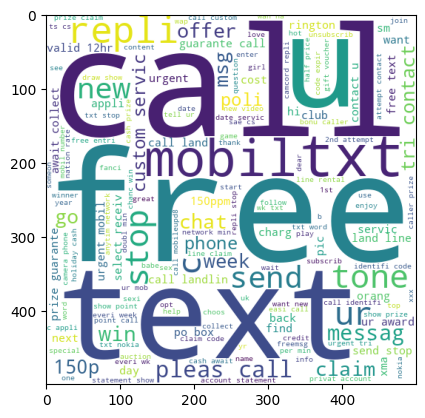

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))

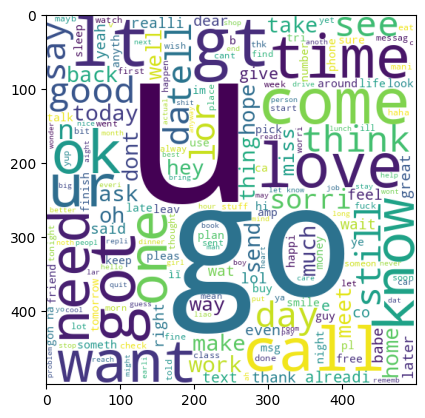

In [ ]:
plt.imshow(ham_wc)

In [ ]:
data[data['target']==0]['transformed_text'].tolist()

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'even brother like speak treat like aid patent',
 'per request mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend callertun',
 'gon na home soon want talk stuff anymor tonight k cri enough today',
 'search right word thank breather promis wont take help grant fulfil promis wonder bless time',
 'date sunday',
 'oh k watch',
 'eh u rememb 2 spell name ye v naughti make v wet',
 'fine thatåõ way u feel thatåõ way gota b',
 'serious spell name',
 'go tri 2 month ha ha joke',
 'pay first lar da stock comin',
 'aft finish lunch go str lor ard 3 smth lor u finish ur lunch alreadi',
 'ffffffffff alright way meet sooner',
 'forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol',
 'lol alway convinc',
 'catch bu fri egg make tea eat mom left dinner feel love

In [ ]:
spam = []
for msg in data[data['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam.append(word)


In [ ]:
len(spam)

9939

In [ ]:
pd.DataFrame(spam).value_counts().head(30)  # This can be used instead of collections

call       320
free       191
2          155
txt        141
text       122
u          119
ur         119
mobil      114
stop       104
repli      103
claim       98
4           97
prize       82
get         74
new         64
servic      64
tone        63
send        60
nokia       57
urgent      57
contact     56
award       55
phone       52
cash        51
pleas       51
week        49
win         48
c           45
collect     45
min         45
dtype: int64

In [ ]:
from collections import Counter
Counter(spam).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [ ]:
pd.DataFrame(Counter(spam).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


<Axes: >

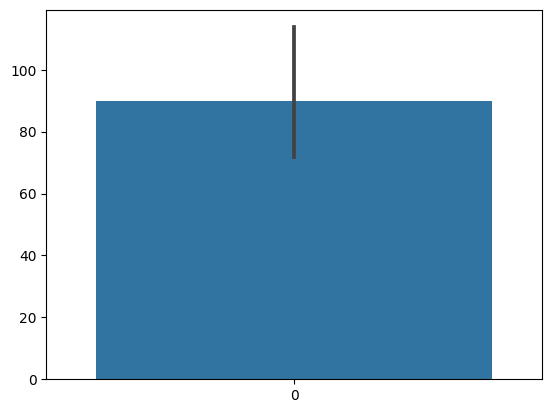

In [ ]:
sns.barplot(pd.DataFrame(Counter(spam).most_common(30))[1])


<Axes: >

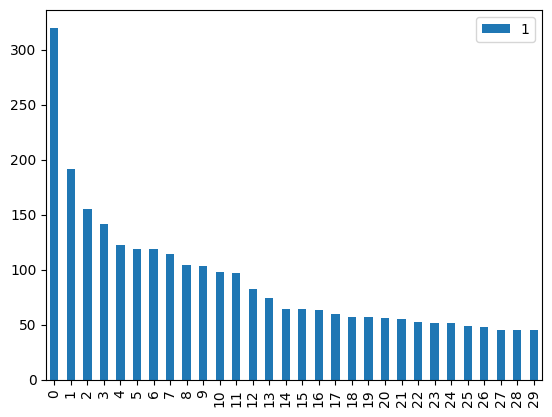

In [ ]:
pd.DataFrame(Counter(spam).most_common(30)).plot(kind='bar')


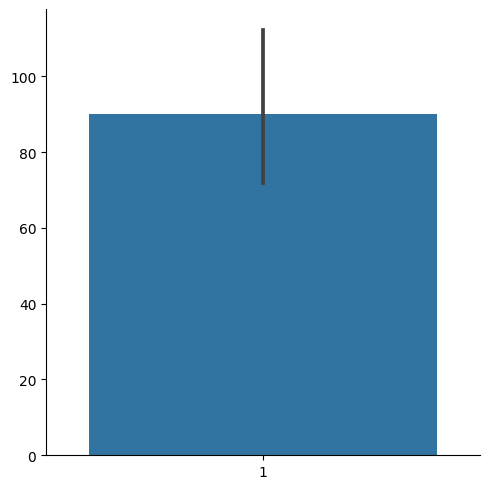

In [ ]:
sns.catplot(pd.DataFrame(Counter(spam).most_common(30)),kind = 'bar')

In [ ]:
ham = []
for msg in data[data['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham.append(word)


In [ ]:
len(ham)

35404

In [ ]:
from collections import Counter
Counter(ham).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [ ]:
pd.DataFrame(Counter(ham).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


<Axes: >

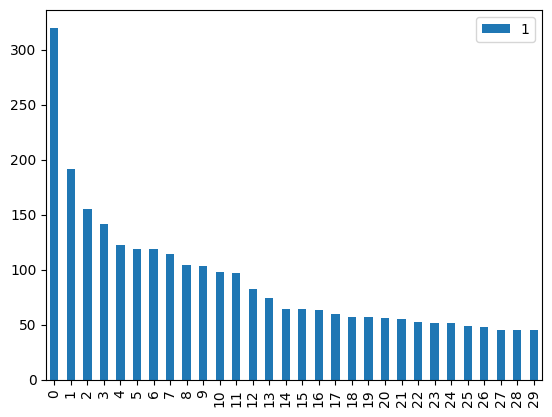

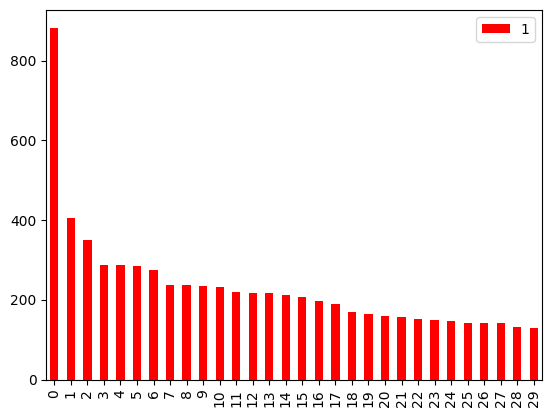

In [ ]:
pd.DataFrame(Counter(spam).most_common(30)).plot(kind='bar')
pd.DataFrame(Counter(ham).most_common(30)).plot(kind='bar',color='Red')


# **Model**

In [ ]:
# Text Vectorization
# using Bag of Words
data.shape

(5169, 6)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [ ]:
# X = cv.fit_transform(data['transformed_text']).toarray()

In [ ]:
X = tfidf.fit_transform(data['transformed_text']).toarray()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [ ]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [ ]:
X.shape

(5169, 6708)

In [ ]:
data['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5169, dtype: int64

In [ ]:
y = data['target'].values

In [ ]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
y.shape

(5169,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
# using Tfidf Vectorizer

In [ ]:
# we will go with tfidf..>>> mnb As precision score is high

# **Model** **Improvement**

In [ ]:
# put max_features = 3000 in tfidf and see the result
# Accuracy will increase

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))